In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t

In [15]:
crime = pd.read_csv('crime-housing-austin-2015.csv')
pd.set_option('display.max_columns', None)
crime

,Key,Council_District,Highest_Offense_Desc,Highest_NIBRS_UCR_Offense_Description,Report_Date,Location,Clearance_Status,Clearance_Date,District,Zip_Code_Crime,Census_Tract,X_Coordinate,Y_Coordinate,Zip_Code_Housing,Populationbelowpovertylevel,Medianhouseholdincome,Non-WhiteNon-HispanicorLatino,HispanicorLatinoofanyrace,Populationwithdisability,Unemployment,Largehouseholds(5+members),Homesaffordabletopeopleearninglessthan$50000,Rentalsaffordabletopeopleearninglessthan$25000,Rent-restrictedunits,HousingChoiceVoucherholders,Medianrent,Medianhomevalue,Percentageofrentalunitsinpoorcondition,Percentchangeinnumberofhousingunits2000-2012,Ownerunitsaffordabletoaverageretail/serviceworker,Rentalunitsaffordabletoaverageretail/serviceworker,Rentalunitsaffordabletoaverageartist,Ownerunitsaffordabletoaverageartist,Rentalunitsaffordabletoaverageteacher,Ownerunitsaffordabletoaverageteacher,Rentalunitsaffordabletoaveragetechworker,Ownerunitsaffordabletoaveragetechworker,Changeinpercentageofpopulationbelowpoverty2000-2012,Changeinmedianrent2000-2012,Changeinmedianhomevalue2000-2012,Percentageofhomeswithin1/4-mioftransitstop,Averagemonthlytransportationcost,Percentageofhousingandtransportationcoststhatistransportation-related
0,201510782,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-15,9001 N IH 35 SVRD NB,N,28-Jan-15,E,78753.0,18.13,3130483.0,10102366.0,78753.0,26%,$39593,20%,60%,10%,9%,16%,78%,14%,17%,4%,$826,$134900,0.7%,19%,8%,11%,40%,24%,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
1,201511231,4.0,ROBBERY BY ASSAULT,Robbery,1-Jan-15,919 E KOENIG LN SVRD EB,N,13-Jan-15,I,78751.0,21.05,3124730.0,10090296.0,78751.0,26%,$38624,11%,14%,6%,9%,2%,11%,13%,1%,0%,$865,$292200,0.4%,7%,0%,9%,38%,2%,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
2,201511736,1.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,12151 N IH 35 SVRD NB,N,13-Jan-15,E,78753.0,18.35,3135985.0,10117220.0,78753.0,26%,$39593,20%,60%,10%,9%,16%,78%,14%,17%,4%,$826,$134900,0.7%,19%,8%,11%,40%,24%,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
3,201511433,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,1044 NORWOOD PARK BLVD,N,5-Jan-15,I,78753.0,18.13,3129896.0,10096032.0,78753.0,26%,$39593,20%,60%,10%,9%,16%,78%,14%,17%,4%,$826,$134900,0.7%,19%,8%,11%,40%,24%,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
4,201511936,2.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,2413 BITTER CREEK DR,N,7-Jan-15,F,78744.0,24.27,3110455.0,10039340.0,78744.0,26%,$41056,9%,77%,8%,9%,23%,93%,7%,24%,8%,$946,$108100,0.7%,35%,13%,6%,22%,33%,81%,87%,100%,100%,89%,26%,44%,63%,$708,40%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38568,20153650803,1.0,THEFT,Theft,31-Dec-15,1100 BLOCK HARGRAVE ST,NaN,NaN,C,78702.0,8.02,3124675.0,10072478.0,78702.0,33%,$34734,18%,56%,14%,11%,10%,21%,41%,39%,2%,$766,$175400,2.2%,15%,0%,39%,51%,2%,80%,15%,99%,67%,3%,73%,207%,96%,$590,39%
38569,20155056956,6.0,THEFT,Theft,31-Dec-15,13776 N US 183 HWY SVRD SB,N,13-Jan-16,A,78750.0,204.03,3096285.0,10140738.0,78750.0,7%,$75958,16%,16%,9%,6%,6%,19%,2%,0%,0%,$1012,$303100,0.3%,32%,4%,1%,15%,5%,70%,15%,99%,51%,104%,20%,64%,21%,$747,33%
38570,20153651059,10.0,THEFT,Theft,31-Dec-15,7025 VILLAGE CENTER DR,C,8-Feb-16,B,78731.0,17.18,3109504.0,10101310.0,78731.0,9%,$78265,12%,9%,8%,4%,2%,13%,4%,0%,0%,$1016,$436800,0.5%,8%,0%,2%,24%,2%,67%,12%,97%,26%,26%,31%,68%,44%,$747,32%
38571,20153651185,1.0,THEFT,Theft,31-Dec-15,6575 DECKER LN,N,10-Feb-16,C,78724.0,22.11,3150290.0,10079608.0,78724.0,38%,$35711,29%,63%,8%,8%,28%,85%,16%,38%,20%,$962,$105700,1.5%,48%,28%,15%,22%,42%,78%,84%,100%,96%,208%,37%,46%,21%,$786,40%


In [16]:
# Convert dollar and percent values to floats
for col in crime.select_dtypes(include=['object']):
    if '$' in crime[col].iloc[0] or '%' in crime[col].iloc[0]:
        crime[col] = crime[col].str.replace('\$|%', '').astype('float')

crime.head()

,Key,Council_District,Highest_Offense_Desc,Highest_NIBRS_UCR_Offense_Description,Report_Date,Location,Clearance_Status,Clearance_Date,District,Zip_Code_Crime,Census_Tract,X_Coordinate,Y_Coordinate,Zip_Code_Housing,Populationbelowpovertylevel,Medianhouseholdincome,Non-WhiteNon-HispanicorLatino,HispanicorLatinoofanyrace,Populationwithdisability,Unemployment,Largehouseholds(5+members),Homesaffordabletopeopleearninglessthan$50000,Rentalsaffordabletopeopleearninglessthan$25000,Rent-restrictedunits,HousingChoiceVoucherholders,Medianrent,Medianhomevalue,Percentageofrentalunitsinpoorcondition,Percentchangeinnumberofhousingunits2000-2012,Ownerunitsaffordabletoaverageretail/serviceworker,Rentalunitsaffordabletoaverageretail/serviceworker,Rentalunitsaffordabletoaverageartist,Ownerunitsaffordabletoaverageartist,Rentalunitsaffordabletoaverageteacher,Ownerunitsaffordabletoaverageteacher,Rentalunitsaffordabletoaveragetechworker,Ownerunitsaffordabletoaveragetechworker,Changeinpercentageofpopulationbelowpoverty2000-2012,Changeinmedianrent2000-2012,Changeinmedianhomevalue2000-2012,Percentageofhomeswithin1/4-mioftransitstop,Averagemonthlytransportationcost,Percentageofhousingandtransportationcoststhatistransportation-related
0,201510782,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-15,9001 N IH 35 SVRD NB,N,28-Jan-15,E,78753.0,18.13,3130483.0,10102366.0,78753.0,26.0,39593.0,20.0,60.0,10.0,9.0,16.0,78.0,14.0,17.0,4.0,826.0,134900.0,0.7,19.0,8.0,11.0,40.0,24.0,89.0,75.0,100.0,98.0,128.0,26.0,40.0,59.0,708.0,44.0
1,201511231,4.0,ROBBERY BY ASSAULT,Robbery,1-Jan-15,919 E KOENIG LN SVRD EB,N,13-Jan-15,I,78751.0,21.05,3124730.0,10090296.0,78751.0,26.0,38624.0,11.0,14.0,6.0,9.0,2.0,11.0,13.0,1.0,0.0,865.0,292200.0,0.4,7.0,0.0,9.0,38.0,2.0,68.0,10.0,97.0,42.0,23.0,38.0,97.0,98.0,550.0,40.0
2,201511736,1.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,12151 N IH 35 SVRD NB,N,13-Jan-15,E,78753.0,18.35,3135985.0,10117220.0,78753.0,26.0,39593.0,20.0,60.0,10.0,9.0,16.0,78.0,14.0,17.0,4.0,826.0,134900.0,0.7,19.0,8.0,11.0,40.0,24.0,89.0,75.0,100.0,98.0,128.0,26.0,40.0,59.0,708.0,44.0
3,201511433,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,1044 NORWOOD PARK BLVD,N,5-Jan-15,I,78753.0,18.13,3129896.0,10096032.0,78753.0,26.0,39593.0,20.0,60.0,10.0,9.0,16.0,78.0,14.0,17.0,4.0,826.0,134900.0,0.7,19.0,8.0,11.0,40.0,24.0,89.0,75.0,100.0,98.0,128.0,26.0,40.0,59.0,708.0,44.0
4,201511936,2.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,2413 BITTER CREEK DR,N,7-Jan-15,F,78744.0,24.27,3110455.0,10039340.0,78744.0,26.0,41056.0,9.0,77.0,8.0,9.0,23.0,93.0,7.0,24.0,8.0,946.0,108100.0,0.7,35.0,13.0,6.0,22.0,33.0,81.0,87.0,100.0,100.0,89.0,26.0,44.0,63.0,708.0,40.0


In [5]:
# Pearson correlations
JanFirst15 = crime[crime.Report_Date == '1-Jan-15']
display(stats.pearsonr(JanFirst15.X_Coordinate, JanFirst15.Y_Coordinate))

(0.4818725328559525, 4.570339684644455e-06)

In [6]:
# species
crime_species = crime.Highest_NIBRS_UCR_Offense_Description
crime_species.unique()

array(['Robbery', 'Burglary', 'Auto Theft', 'Agg Assault', 'Theft',
       'Rape', 'Murder'], dtype=object)

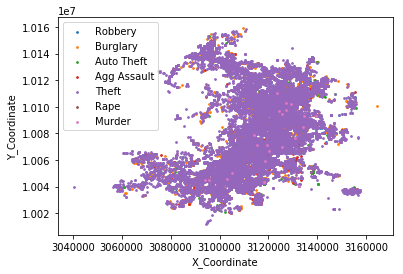

In [7]:
# scatterplots
for species in crime_species.unique():
    data = crime[crime.Highest_NIBRS_UCR_Offense_Description == species]
    plt.scatter(x=data.X_Coordinate, y=data.Y_Coordinate, label=species, s=3)
plt.xlabel('X_Coordinate')    
plt.ylabel('Y_Coordinate')    
plt.legend()

<BarContainer object of 2 artists>

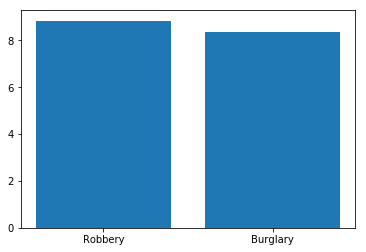

In [8]:
# averages
Robbery = crime[crime.Highest_NIBRS_UCR_Offense_Description == 'Robbery']
Burglary = crime[crime.Highest_NIBRS_UCR_Offense_Description == 'Burglary']
plt.bar([1,2],[Robbery.Unemployment.mean(),Burglary.Unemployment.mean()], tick_label=['Robbery','Burglary'])

In [9]:
# standard deviations
groupedByClass = crime.groupby('Highest_NIBRS_UCR_Offense_Description')
groupedByClass.agg({'Unemployment':['mean', 'std'], 'Populationbelowpovertylevel':['mean', 'std']})

Unemployment            \
                                              mean       std   
Highest_NIBRS_UCR_Offense_Description                          
Agg Assault                               8.834222  2.262205   
Auto Theft                                8.480226  2.399896   
Burglary                                  8.369946  2.454860   
Murder                                    9.304348  2.401416   
Rape                                      8.433404  2.098300   
Robbery                                   8.842562  2.008723   
Theft                                     8.165402  2.490289   

                                      Populationbelowpovertylevel             
                                                             mean        std  
Highest_NIBRS_UCR_Offense_Description                                         
Agg Assault                                             25.706290  11.041526  
Auto Theft                                              24.291217  12.795969  
Burglary                                                23.290955  12.048680  
Murder                                                  26.956522  11.733705  
Rape                                                    24.589852  11.958830  
Robbery                                                 26.116178  10.590632  
Theft                                                   22.675217  13.310100

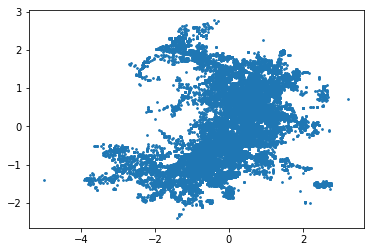

In [10]:
# scatterplots of standardized data 
X_stand=(crime.X_Coordinate-crime.X_Coordinate.mean())/crime.X_Coordinate.std()
Y_stand=(crime.Y_Coordinate-crime.Y_Coordinate.mean())/crime.Y_Coordinate.std()
plt.scatter(x=X_stand, y=Y_stand, s=3)



Text(0.5, 1.0, 't pdf')

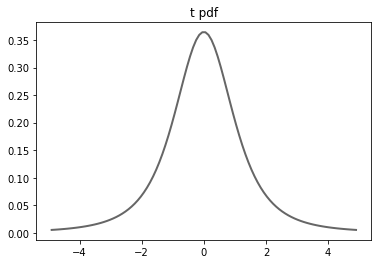

In [11]:
# t-test  not sure!
df = 2.74335149908 # Degrees of freedom
mean, var, skew, kurt = t.stats(df, moments='mvsk')
x = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 100)
plt.plot(x, t.pdf(x, df), 'k-', lw=2, alpha=0.6, label='t pdf')
plt.title('t pdf')

In [12]:
data_code_crime_prop = pd.DataFrame(crime['Report_Date'].value_counts(normalize=True).reset_index())
data_code_crime_prop.columns = ['Report_Date', 'crime_prop_data']
data_code_crime_prop
crime = pd.merge(crime, data_code_crime_prop, on='Report_Date')
crime

,Key,Council_District,Highest_Offense_Desc,Highest_NIBRS_UCR_Offense_Description,Report_Date,Location,Clearance_Status,Clearance_Date,District,Zip_Code_Crime,Census_Tract,X_Coordinate,Y_Coordinate,Zip_Code_Housing,Populationbelowpovertylevel,Medianhouseholdincome,Non-WhiteNon-HispanicorLatino,HispanicorLatinoofanyrace,Populationwithdisability,Unemployment,Largehouseholds(5+members),Homesaffordabletopeopleearninglessthan$50000,Rentalsaffordabletopeopleearninglessthan$25000,Rent-restrictedunits,HousingChoiceVoucherholders,Medianrent,Medianhomevalue,Percentageofrentalunitsinpoorcondition,Percentchangeinnumberofhousingunits2000-2012,Ownerunitsaffordabletoaverageretail/serviceworker,Rentalunitsaffordabletoaverageretail/serviceworker,Rentalunitsaffordabletoaverageartist,Ownerunitsaffordabletoaverageartist,Rentalunitsaffordabletoaverageteacher,Ownerunitsaffordabletoaverageteacher,Rentalunitsaffordabletoaveragetechworker,Ownerunitsaffordabletoaveragetechworker,Changeinpercentageofpopulationbelowpoverty2000-2012,Changeinmedianrent2000-2012,Changeinmedianhomevalue2000-2012,Percentageofhomeswithin1/4-mioftransitstop,Averagemonthlytransportationcost,Percentageofhousingandtransportationcoststhatistransportation-related,crime_prop_data
0,201510782,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-15,9001 N IH 35 SVRD NB,N,28-Jan-15,E,78753.0,18.13,3130483.0,10102366.0,78753.0,26.0,39593.0,20.0,60.0,10.0,9.0,16.0,78.0,14.0,17.0,4.0,826.0,134900.0,0.7,19.0,8.0,11.0,40.0,24.0,89.0,75.0,100.0,98.0,128.0,26.0,40.0,59.0,708.0,44.0,0.002126
1,201511231,4.0,ROBBERY BY ASSAULT,Robbery,1-Jan-15,919 E KOENIG LN SVRD EB,N,13-Jan-15,I,78751.0,21.05,3124730.0,10090296.0,78751.0,26.0,38624.0,11.0,14.0,6.0,9.0,2.0,11.0,13.0,1.0,0.0,865.0,292200.0,0.4,7.0,0.0,9.0,38.0,2.0,68.0,10.0,97.0,42.0,23.0,38.0,97.0,98.0,550.0,40.0,0.002126
2,201511736,1.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,12151 N IH 35 SVRD NB,N,13-Jan-15,E,78753.0,18.35,3135985.0,10117220.0,78753.0,26.0,39593.0,20.0,60.0,10.0,9.0,16.0,78.0,14.0,17.0,4.0,826.0,134900.0,0.7,19.0,8.0,11.0,40.0,24.0,89.0,75.0,100.0,98.0,128.0,26.0,40.0,59.0,708.0,44.0,0.002126
3,201511433,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,1044 NORWOOD PARK BLVD,N,5-Jan-15,I,78753.0,18.13,3129896.0,10096032.0,78753.0,26.0,39593.0,20.0,60.0,10.0,9.0,16.0,78.0,14.0,17.0,4.0,826.0,134900.0,0.7,19.0,8.0,11.0,40.0,24.0,89.0,75.0,100.0,98.0,128.0,26.0,40.0,59.0,708.0,44.0,0.002126
4,201511936,2.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,2413 BITTER CREEK DR,N,7-Jan-15,F,78744.0,24.27,3110455.0,10039340.0,78744.0,26.0,41056.0,9.0,77.0,8.0,9.0,23.0,93.0,7.0,24.0,8.0,946.0,108100.0,0.7,35.0,13.0,6.0,22.0,33.0,81.0,87.0,100.0,100.0,89.0,26.0,44.0,63.0,708.0,40.0,0.002126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38568,20153650803,1.0,THEFT,Theft,31-Dec-15,1100 BLOCK HARGRAVE ST,NaN,NaN,C,78702.0,8.02,3124675.0,10072478.0,78702.0,33.0,34734.0,18.0,56.0,14.0,11.0,10.0,21.0,41.0,39.0,2.0,766.0,175400.0,2.2,15.0,0.0,39.0,51.0,2.0,80.0,15.0,99.0,67.0,3.0,73.0,207.0,96.0,590.0,39.0,0.002567
38569,20155056956,6.0,THEFT,Theft,31-Dec-15,13776 N US 183 HWY SVRD SB,N,13-Jan-16,A,78750.0,204.03,3096285.0,10140738.0,78750.0,7.0,75958.0,16.0,16.0,9.0,6.0,6.0,19.0,2.0,0.0,0.0,1012.0,303100.0,0.3,32.0,4.0,1.0,15.0,5.0,70.0,15.0,99.0,51.0,104.0,20.0,64.0,21.0,747.0,33.0,0.002567
38570,20153651059,10.0,THEFT,Theft,31-Dec-15,7025 VILLAGE CENTER DR,C,8-Feb-16,B,78731.0,17.18,3109504.0,10101310.0,78731.0,9.0,78265.0,12.0,9.0,8.0,4.0,2.0,13.0,4.0,0.0,0.0,1016.0,436800.0,0.5,8.0,0.0,2.0,24.0,2.0,67.0,12.0,97.0,26.0,26.0,31.0,68.0,44.0,747.0,32.0,0.002567
38571,20153651185,1.0,THEFT,Theft,31-Dec-15,6575 DECKER LN,N,10-Feb-16,C,78724.0,22.11,3150290.0,10079608.0,78724.0,38.0,35711.0,29.0,63.0,8.0,8.0,28.0,85.0,16.0,38.0,20.0,962.0,105700.0,1.5,48.0,28.0,15.0,22.0,42.0,78.0,84.0,100.0,96.0,208.0,37.0,46.0,21.0,786.0,40.0,0.0025

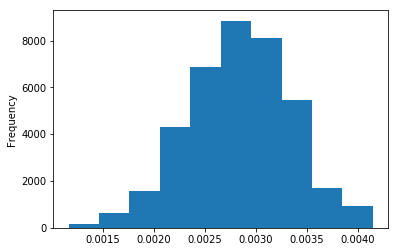

In [13]:
# Not normal but close enough
crime['crime_prop_data'].plot.hist()

<BarContainer object of 38573 artists>

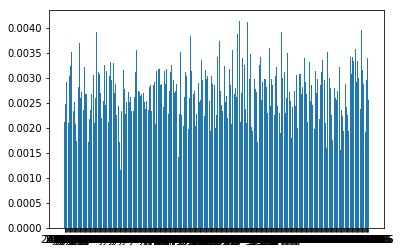

In [14]:
plt.bar(crime['Report_Date'],crime['crime_prop_data'])

In [16]:
zip_code_crime_prop = pd.DataFrame(crime['Zip_Code_Crime'].value_counts(normalize=True).reset_index())
zip_code_crime_prop.columns = ['Zip_Code_Crime', 'crime_prop']
zip_code_crime_prop
crime = pd.merge(crime, zip_code_crime_prop, on='Zip_Code_Crime')

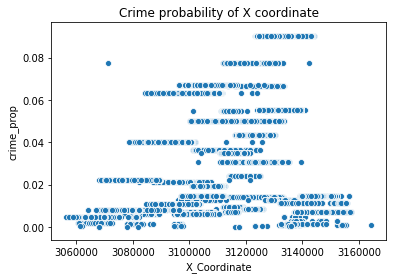

In [17]:
plt.title('Crime probability of X coordinate')
sns.scatterplot(crime['X_Coordinate'], crime['crime_prop'])

<BarContainer object of 38414 artists>

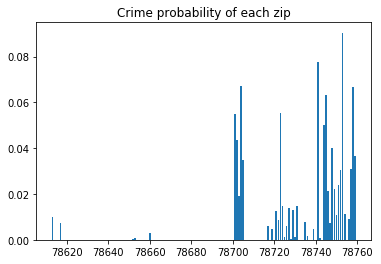

In [19]:
plt.title('Crime probability of each zip')
plt.bar(crime['Zip_Code_Crime'],crime['crime_prop'])

In [27]:
crime['Report_Date'] = pd.to_datetime(crime['Report_Date'])

In [30]:
crime

,Key,Council_District,Highest_Offense_Desc,Highest_NIBRS_UCR_Offense_Description,Report_Date,Location,Clearance_Status,Clearance_Date,District,Zip_Code_Crime,Census_Tract,X_Coordinate,Y_Coordinate,Zip_Code_Housing,Populationbelowpovertylevel,Medianhouseholdincome,Non-WhiteNon-HispanicorLatino,HispanicorLatinoofanyrace,Populationwithdisability,Unemployment,Largehouseholds(5+members),Homesaffordabletopeopleearninglessthan$50000,Rentalsaffordabletopeopleearninglessthan$25000,Rent-restrictedunits,HousingChoiceVoucherholders,Medianrent,Medianhomevalue,Percentageofrentalunitsinpoorcondition,Percentchangeinnumberofhousingunits2000-2012,Ownerunitsaffordabletoaverageretail/serviceworker,Rentalunitsaffordabletoaverageretail/serviceworker,Rentalunitsaffordabletoaverageartist,Ownerunitsaffordabletoaverageartist,Rentalunitsaffordabletoaverageteacher,Ownerunitsaffordabletoaverageteacher,Rentalunitsaffordabletoaveragetechworker,Ownerunitsaffordabletoaveragetechworker,Changeinpercentageofpopulationbelowpoverty2000-2012,Changeinmedianrent2000-2012,Changeinmedianhomevalue2000-2012,Percentageofhomeswithin1/4-mioftransitstop,Averagemonthlytransportationcost,Percentageofhousingandtransportationcoststhatistransportation-related
0,201510782,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,2015-01-01,9001 N IH 35 SVRD NB,N,28-Jan-15,E,78753.0,18.13,3130483.0,10102366.0,78753.0,26%,$39593,20%,60%,10%,9%,16%,78%,14%,17%,4%,$826,$134900,0.7%,19%,8%,11%,40%,24%,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
1,201511231,4.0,ROBBERY BY ASSAULT,Robbery,2015-01-01,919 E KOENIG LN SVRD EB,N,13-Jan-15,I,78751.0,21.05,3124730.0,10090296.0,78751.0,26%,$38624,11%,14%,6%,9%,2%,11%,13%,1%,0%,$865,$292200,0.4%,7%,0%,9%,38%,2%,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
2,201511736,1.0,BURGLARY OF RESIDENCE,Burglary,2015-01-01,12151 N IH 35 SVRD NB,N,13-Jan-15,E,78753.0,18.35,3135985.0,10117220.0,78753.0,26%,$39593,20%,60%,10%,9%,16%,78%,14%,17%,4%,$826,$134900,0.7%,19%,8%,11%,40%,24%,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
3,201511433,4.0,BURGLARY OF RESIDENCE,Burglary,2015-01-01,1044 NORWOOD PARK BLVD,N,5-Jan-15,I,78753.0,18.13,3129896.0,10096032.0,78753.0,26%,$39593,20%,60%,10%,9%,16%,78%,14%,17%,4%,$826,$134900,0.7%,19%,8%,11%,40%,24%,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
4,201511936,2.0,BURGLARY OF RESIDENCE,Burglary,2015-01-01,2413 BITTER CREEK DR,N,7-Jan-15,F,78744.0,24.27,3110455.0,10039340.0,78744.0,26%,$41056,9%,77%,8%,9%,23%,93%,7%,24%,8%,$946,$108100,0.7%,35%,13%,6%,22%,33%,81%,87%,100%,100%,89%,26%,44%,63%,$708,40%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38568,20153650803,1.0,THEFT,Theft,2015-12-31,1100 BLOCK HARGRAVE ST,NaN,NaN,C,78702.0,8.02,3124675.0,10072478.0,78702.0,33%,$34734,18%,56%,14%,11%,10%,21%,41%,39%,2%,$766,$175400,2.2%,15%,0%,39%,51%,2%,80%,15%,99%,67%,3%,73%,207%,96%,$590,39%
38569,20155056956,6.0,THEFT,Theft,2015-12-31,13776 N US 183 HWY SVRD SB,N,13-Jan-16,A,78750.0,204.03,3096285.0,10140738.0,78750.0,7%,$75958,16%,16%,9%,6%,6%,19%,2%,0%,0%,$1012,$303100,0.3%,32%,4%,1%,15%,5%,70%,15%,99%,51%,104%,20%,64%,21%,$747,33%
38570,20153651059,10.0,THEFT,Theft,2015-12-31,7025 VILLAGE CENTER DR,C,8-Feb-16,B,78731.0,17.18,3109504.0,10101310.0,78731.0,9%,$78265,12%,9%,8%,4%,2%,13%,4%,0%,0%,$1016,$436800,0.5%,8%,0%,2%,24%,2%,67%,12%,97%,26%,26%,31%,68%,44%,$747,32%
38571,20153651185,1.0,THEFT,Theft,2015-12-31,6575 DECKER LN,N,10-Feb-16,C,78724.0,22.11,3150290.0,10079608.0,78724.0,38%,$35711,29%,63%,8%,8%,28%,85%,16%,38%,20%,$962,$105700,1.5%,48%,28%,15%,22%,42%,78%,84%,100%,96%,208%,37%,46%,21%,$786,40%


In [32]:
 crime.Report_Date.dt.month
group_month = crime.groupby( crime.Report_Date.dt.month).count()
group_month

,Key,Council_District,Highest_Offense_Desc,Highest_NIBRS_UCR_Offense_Description,Report_Date,Location,Clearance_Status,Clearance_Date,District,Zip_Code_Crime,Census_Tract,X_Coordinate,Y_Coordinate,Zip_Code_Housing,Populationbelowpovertylevel,Medianhouseholdincome,Non-WhiteNon-HispanicorLatino,HispanicorLatinoofanyrace,Populationwithdisability,Unemployment,Largehouseholds(5+members),Homesaffordabletopeopleearninglessthan$50000,Rentalsaffordabletopeopleearninglessthan$25000,Rent-restrictedunits,HousingChoiceVoucherholders,Medianrent,Medianhomevalue,Percentageofrentalunitsinpoorcondition,Percentchangeinnumberofhousingunits2000-2012,Ownerunitsaffordabletoaverageretail/serviceworker,Rentalunitsaffordabletoaverageretail/serviceworker,Rentalunitsaffordabletoaverageartist,Ownerunitsaffordabletoaverageartist,Rentalunitsaffordabletoaverageteacher,Ownerunitsaffordabletoaverageteacher,Rentalunitsaffordabletoaveragetechworker,Ownerunitsaffordabletoaveragetechworker,Changeinpercentageofpopulationbelowpoverty2000-2012,Changeinmedianrent2000-2012,Changeinmedianhomevalue2000-2012,Percentageofhomeswithin1/4-mioftransitstop,Averagemonthlytransportationcost,Percentageofhousingandtransportationcoststhatistransportation-related
Report_Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3067,3066,3067,3067,3067,3039,2977,2977,3067,3066,3066,3039,3039,2955,2956,2956,2956,2956,2956,2956,2956,2936,2956,2956,2956,2956,2956,2956,2956,2936,2956,2956,2936,2956,2936,2956,2936,2956,2956,2956,2956,2956,2956
2,2873,2861,2873,2873,2873,2838,2801,2801,2873,2862,2862,2827,2827,2791,2802,2802,2802,2802,2802,2802,2802,2784,2802,2802,2802,2802,2802,2802,2802,2784,2802,2802,2784,2802,2784,2802,2784,2802,2802,2802,2802,2802,2802
3,3203,3194,3203,3203,3203,3162,3061,3061,3203,3195,3195,3156,3156,3111,3119,3119,3119,3119,3119,3119,3119,3094,3119,3119,3119,3119,3119,3119,3119,3094,3119,3119,3094,3119,3094,3119,3094,3119,3119,3119,3119,3119,3119
4,3190,3180,3190,3190,3190,3140,3074,3074,3190,3180,3180,3134,3134,3099,3109,3109,3109,3109,3109,3109,3109,3089,3109,3109,3109,3109,3109,3109,3109,3089,3109,3109,3089,3109,3089,3109,3089,3109,3109,3109,3109,3109,3109
5,3349,3332,3349,3349,3349,3297,3186,3186,3349,3332,3332,3287,3287,3246,3263,3263,3263,3263,3263,3263,3263,3239,3263,3263,3263,3263,3263,3263,3263,3239,3263,3263,3239,3263,3239,3263,3239,3263,3263,3263,3263,3263,3263
6,3288,3267,3288,3288,3288,3236,3118,3118,3288,3268,3268,3220,3220,3146,3166,3166,3166,3166,3166,3166,3166,3138,3166,3166,3166,3166,3166,3166,3166,3138,3166,3166,3138,3166,3138,3166,3138,3166,3166,3166,3166,3166,3166
7,3524,3506,3524,3524,3524,3469,3369,3369,3524,3507,3507,3458,3458,3411,3428,3428,3428,3428,3428,3428,3428,3408,3428,3428,3428,3428,3428,3428,3428,3408,3428,3428,3408,3428,3408,3428,3408,3428,3428,3428,3428,3428,3428
8,3346,3326,3346,3346,3346,3298,3206,3206,3346,3331,3331,3286,3286,3241,3256,3256,3256,3256,3256,3256,3256,3232,3256,3256,3256,3256,3256,3256,3256,3232,3256,3256,3232,3256,3232,3256,3232,3256,3256,3256,3256,3256,3256
9,3166,3149,3166,3166,3166,3136,2996,2996,3166,3149,3149,3125,3125,3071,3088,3088,3088,3088,3088,3088,3088,3065,3088,3088,3088,3088,3088,3088,3088,3065,3088,3088,3065,3088,3065,3088,3065,3088,3088,3088,3088,3088,3088


<BarContainer object of 12 artists>

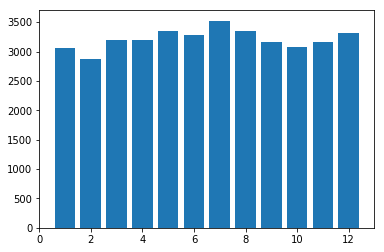

In [37]:
plt.bar(range(1,13),group_month['Key'])

In [7]:
# Find high correlations
from itertools import combinations

num_subset = crime.columns[14:]
crime_subset = crime[num_subset]
combs = combinations(crime_subset.columns, 2)

corrs = []
for comb in combs:
    corr, pval = stats.pearsonr(crime_subset[comb[0]], crime_subset[comb[1]])
    if corr >= 0.4:
        corrs.append((comb, corr, pval))
        
corrs.sort(key=lambda x: x[1], reverse=True)

In [17]:
display(crime.corr()['Ownerunitsaffordabletoaverageteacher'].sort_values(ascending=False))


# Standardize Ownerunitsaffordabletoaverageteacher
mean = crime['Ownerunitsaffordabletoaverageteacher'].mean()
std_dev = crime['Ownerunitsaffordabletoaverageteacher'].std()
crime['std_Ownerunitsaffordabletoaverageteacher'] = (crime['Ownerunitsaffordabletoaverageteacher'] - mean) / std_dev


# Standardize Homesaffordabletopeopleearninglessthan$50000
mean = crime['Homesaffordabletopeopleearninglessthan$50000'].mean()
std_dev = crime['Homesaffordabletopeopleearninglessthan$50000'].std()
crime['std_Homesaffordabletopeopleearninglessthan$50000'] = (crime['Homesaffordabletopeopleearninglessthan$50000'] - mean) / std_dev

Ownerunitsaffordabletoaverageteacher                                     1.000000
Homesaffordabletopeopleearninglessthan$50000                             0.996700
Ownerunitsaffordabletoaverageartist                                      0.929891
HispanicorLatinoofanyrace                                                0.826550
Ownerunitsaffordabletoaverageretail/serviceworker                        0.797478
Ownerunitsaffordabletoaveragetechworker                                  0.781085
Largehouseholds(5+members)                                               0.753543
Rentalunitsaffordabletoaverageteacher                                    0.627759
HousingChoiceVoucherholders                                              0.593495
Percentageofhousingandtransportationcoststhatistransportation-related    0.554568
X_Coordinate                                                             0.542580
Populationbelowpovertylevel                                              0.481863
Rent-restrictedu

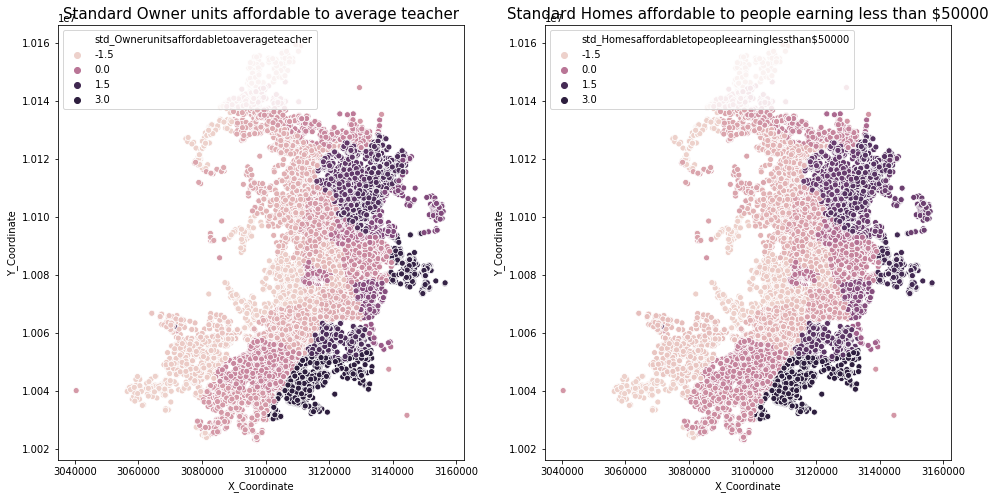

In [18]:
# Scatter plot of crime location
# plt.figure(figsize=(16, 16))
plt.figure(figsize=(16, 8))
# plt.suptitle('Geographic Distribution of Crime', fontsize=20)
#sns.scatterplot(x='X_Coordinate', y='Y_Coordinate', hue='Highest_NIBRS_UCR_Offense_Description', data=df, ax=plt.subplot(221)).legend(loc='upper left')
#sns.scatterplot(x='X_Coordinate', y='Y_Coordinate', hue='Clearance_Status', data=df, ax=plt.subplot(222)).legend(loc='upper left')
ax1 = sns.scatterplot(x='X_Coordinate', y='Y_Coordinate', hue='std_Ownerunitsaffordabletoaverageteacher', data=crime, ax=plt.subplot(121))
ax1.set_title('Standard Owner units affordable to average teacher', fontdict={'fontsize': 15})
ax1.legend(loc='upper left')
ax2 = sns.scatterplot(x='X_Coordinate', y='Y_Coordinate', hue='std_Homesaffordabletopeopleearninglessthan$50000', data=crime, ax=plt.subplot(122))
ax2.set_title('Standard Homes affordable to people earning less than $50000', fontdict={'fontsize': 15})
ax2.legend(loc='upper left')

# plt.savefig('imgs/teacher50000.png')
plt.show()